In [1]:
# Initial imports
import os
import pandas as pd
import numpy as np
import hvplot.pandas
import yfinance as yf
from datetime import datetime
#from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
# Load .env enviroment variables
#load_dotenv("alpaca.env")
from yahoo_fin import options as op

import holoviews as hv
from prophet import Prophet
import seaborn as sns
from datetime import datetime, timezone, timedelta
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Create current date variable
import datetime
today = datetime.date.today()
historical = today - datetime.timedelta(days=365)

In [3]:
# Format current date as ISO format
start_date = pd.Timestamp(historical, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

#end_date = pd.Timestamp.now(tz='America/New_York').isoformat()
#start_date = (pd.Timestamp.now(tz='America/New_York') - pd.DateOffset(years=1)).isoformat()

In [4]:
import yfinance as yf
from datetime import datetime, timedelta

tickers = ['XLE', 'CAD=X', 'MXN=X', 'BRL=X', 'SAR=X', 'IQD=X', 'COP=X',  'CL=F', 'NG=F', 'MTF=F']

# Calculate 365 days back from today
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

#Pull data

energy_df = yf.download(tickers, period="1y")['Close'].dropna()
energy_df


[*********************100%%**********************]  10 of 10 completed


Ticker,BRL=X,CAD=X,CL=F,COP=X,IQD=X,MTF=F,MXN=X,NG=F,SAR=X,XLE
Date,,,,,,,,,,
2023-04-17,4.9087,1.33650,80.830002,4412.529785,1277.770264,136.149994,17.992880,2.275,3.750300,86.199997
2023-04-18,4.9398,1.33920,80.860001,4426.750000,1459.000000,136.649994,18.032200,2.366,3.746317,86.540001
2023-04-19,4.9843,1.33909,79.160004,4487.379883,1458.000000,137.350006,18.043489,2.222,3.745706,86.239998
2023-04-20,5.0743,1.34680,77.290001,4532.250000,1291.671265,138.500000,18.040501,2.249,3.745492,85.480003
2023-04-21,5.0477,1.34808,77.870003,4525.149902,1458.000000,138.399994,17.997910,2.233,3.745881,84.980003
...,...,...,...,...,...,...,...,...,...,...
2024-04-10,5.0076,1.35729,86.209999,3765.250000,1308.000000,118.250000,16.383310,1.885,3.746029,97.790001
2024-04-11,5.0662,1.36870,85.019997,3802.250000,1308.000000,120.750000,16.452499,1.764,3.746358,97.720001
2024-04-12,5.0904,1.36869,85.660004,3822.250000,1281.953369,122.000000,16.426100,1.770,3.746487,96.129997


In [5]:
test_df = energy_df.copy()
test_df.reset_index(inplace = True)
#test_df.reset_index(inplace = True)
#test_df.set_index('Date', inplace=True)
test_df


Ticker,Date,BRL=X,CAD=X,CL=F,COP=X,IQD=X,MTF=F,MXN=X,NG=F,SAR=X,XLE
0,2023-04-17,4.9087,1.33650,80.830002,4412.529785,1277.770264,136.149994,17.992880,2.275,3.750300,86.199997
1,2023-04-18,4.9398,1.33920,80.860001,4426.750000,1459.000000,136.649994,18.032200,2.366,3.746317,86.540001
2,2023-04-19,4.9843,1.33909,79.160004,4487.379883,1458.000000,137.350006,18.043489,2.222,3.745706,86.239998
3,2023-04-20,5.0743,1.34680,77.290001,4532.250000,1291.671265,138.500000,18.040501,2.249,3.745492,85.480003
4,2023-04-21,5.0477,1.34808,77.870003,4525.149902,1458.000000,138.399994,17.997910,2.233,3.745881,84.980003
...,...,...,...,...,...,...,...,...,...,...,...
247,2024-04-10,5.0076,1.35729,86.209999,3765.250000,1308.000000,118.250000,16.383310,1.885,3.746029,97.790001
248,2024-04-11,5.0662,1.36870,85.019997,3802.250000,1308.000000,120.750000,16.452499,1.764,3.746358,97.720001
249,2024-04-12,5.0904,1.36869,85.660004,3822.250000,1281.953369,122.000000,16.426100,1.770,3.746487,96.129997
250,2024-04-15,5.1171,1.37580,85.410004,3813.100098,1278.706909,120.699997,16.611080,1.691,3.750700,95.230003


In [6]:
xle = yf.Ticker("XLE")
opt = xle.option_chain(date= '2024-07-19')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,XLE240719P00045000,2024-03-05 18:24:17+00:00,45.0,0.03,0.00,0.95,0.00,0.000000,5,241,0.846681,False,REGULAR,USD
1,XLE240719P00050000,2024-02-16 20:32:07+00:00,50.0,0.04,0.00,0.35,0.00,0.000000,2,2,0.621098,False,REGULAR,USD
2,XLE240719P00055000,2024-03-25 17:47:04+00:00,55.0,0.01,0.00,0.18,0.00,0.000000,240,244,0.540044,False,REGULAR,USD
3,XLE240719P00060000,2024-04-12 17:32:31+00:00,60.0,0.08,0.01,0.19,0.00,0.000000,1,232,0.466802,False,REGULAR,USD
4,XLE240719P00065000,2024-04-12 15:51:37+00:00,65.0,0.14,0.02,0.41,0.00,0.000000,1,1103,0.456548,False,REGULAR,USD
5,XLE240719P00070000,2024-04-12 15:06:14+00:00,70.0,0.06,0.07,0.69,0.00,0.000000,2,1325,0.429937,False,REGULAR,USD
6,XLE240719P00071000,2024-03-28 17:19:40+00:00,71.0,0.13,0.08,0.12,0.00,0.000000,1,21,0.289558,False,REGULAR,USD
7,XLE240719P00072000,2024-04-11 18:48:44+00:00,72.0,0.07,0.09,0.13,0.00,0.000000,10,77,0.281257,False,REGULAR,USD
8,XLE240719P00073000,2024-03-21 19:49:08+00:00,73.0,0.19,0.09,0.13,0.00,0.000000,1,53,0.268562,False,REGULAR,USD
9,XLE240719P00074000,2024-03-21 19:15:07+00:00,74.0,0.21,0.12,0.34,0.00,0.000000,1,139,0.309089,False,REGULAR,USD


In [7]:
prophet_df = pd.DataFrame(yf.download('XLE', period="3y")['Close'])
prophet_df

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2021-04-19,48.349998
2021-04-20,47.070000
2021-04-21,47.669998
2021-04-22,47.110001
2021-04-23,47.540001
...,...
2024-04-10,97.790001
2024-04-11,97.720001
2024-04-12,96.129997


:Curve   [index]   (y)

18:13:11 - cmdstanpy - INFO - Chain [1] start processing
18:13:11 - cmdstanpy - INFO - Chain [1] done processing


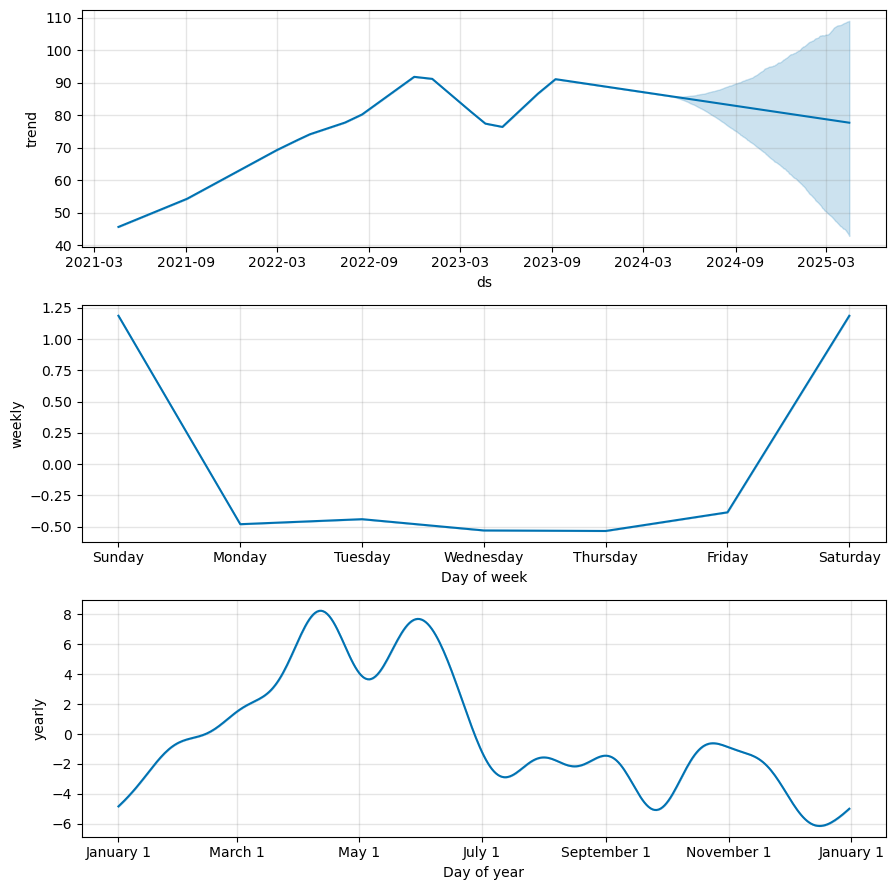

In [8]:
# Prophet Section

interim = prophet_df.copy().reset_index()
#interim = interim.reset_index()

prophet_model = interim[['Date', 'Close']]
prophet_model['Date'] = prophet_model['Date'].apply(lambda d: d.replace(tzinfo=None))
prophet_model.rename(columns={"Date":"ds", "Close":"y"}, inplace=True)

#display(prophet_model)


#Plotting Trends Dataframe'

display(prophet_model.hvplot(title= "Trends", xlabel="Date",ylabel="Closing Prices", xticks="symbol"))


Prophet_trends=Prophet()

Prophet_trends.fit(prophet_model)

Prophet_trends_forecast = Prophet_trends.make_future_dataframe(periods=365, freq='D')
#Prophet_trends_forecast
forecast = Prophet_trends.predict(Prophet_trends_forecast)
forecast

forecast[['yhat', 'yhat_lower', 'yhat_upper']].hvplot()
fig2 = Prophet_trends.plot_components(forecast)


In [9]:
# Add dummy variable for Mar, Apr, May, Jun

#test_df['seasons'] = 0
#test_df['seasons'] = np.where((7>test_df.index > 2), 1.0, 0.0)
#test_df

In [25]:
# Kerim Machine Learning

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Target: Energy_Sector_ETF 
# Features: Crude_Oil, Natural_Gas, Coal and Currencies of Energy-importing countries to USD.
# Define the list of tickers and currency pairs.
currencies = ['CAD', 'MXN', 'BRL', 'SAR', 'IQD', 'COP']
tickers = ['XLE', 'CL=F', 'NG=F', 'MTF=F'] + [f'USD{currency}=X' for currency in currencies]

# Fetch close prices for tickers and currency pairs for the last 365 days and drop NaN
energy = yf.download(tickers, period="1y")['Close'].dropna()

# Check if data was fetched successfully
if energy is not None:
    
    # List to store predicted prices
    predicted_prices_LR = []
    predicted_prices_RF = []
    
    # Create DataFrame to store predicted prices
    predicted_prices_df = pd.DataFrame(columns=['Date', 'Predicted Price (LR)', 'Predicted Price (RF)'])

    # Extract last date from original DataFrame
    last_date = energy.index[-1]

    for i in range(1, 91):  # Loop for 90 days
        
        # Features
        X = energy.drop(columns='XLE').shift(i).dropna()
        # Target
        y = energy['XLE'][i:]

        # Initialize the StandardScaler
        scaler = StandardScaler()

        #  Fit the scaler on the training data
        scaler.fit(X)

        # Transform the training data
        X_scaled = scaler.transform(X)

        # Create a model
        LR_model = LinearRegression()
        RF_model = RandomForestRegressor()

        # Fit the model
        LR_model.fit(X_scaled, y)
        RF_model.fit(X_scaled, y)

        # Get today's features (all except XLE)
        today_features = energy.drop(columns='XLE').iloc[-1]

        # Scale today's features
        today_features_scaled = scaler.transform([today_features])

        # Predict
        predicted_price_LR = LR_model.predict(today_features_scaled)[0]
        predicted_price_RF = RF_model.predict(today_features_scaled)[0]
        

        # Append predicted prices to the lists
        predicted_prices_LR.append(predicted_price_LR)
        predicted_prices_RF.append(predicted_price_RF)
    
    # Generate dates for the predicted prices
    new_dates = [last_date + timedelta(days=i) for i in range(1, 91)]

    # Assign the predicted prices and new dates to the DataFrame
    predicted_prices_df['Date'] = new_dates
    predicted_prices_df['Predicted Price (LR)'] = predicted_prices_LR
    predicted_prices_df['Predicted Price (RF)'] = predicted_prices_RF
#Plot predictions
predicted_prices_df.hvplot(x='Date', 
                           y=['Predicted Price (LR)', 'Predicted Price (RF)'], 
                           title='Predicted Prices', xlabel='Date', ylabel='Price',
                           width=800,        
                           height=300 
                          ).opts(yformatter='%.0f', active_tools=[])

[*********************100%%**********************]  10 of 10 completed


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [27]:
predicted_prices_df

,Date,Predicted Price (LR),Predicted Price (RF),Average Predicted Price
0,2024-04-17,97.103847,89.876900,93.490374
1,2024-04-18,97.493848,90.182501,93.838174
2,2024-04-19,98.014001,90.297801,94.155901
3,2024-04-20,98.296483,90.968900,94.632692
4,2024-04-21,98.372631,91.649800,95.011216
...,...,...,...,...
85,2024-07-11,87.152858,83.710600,85.431729
86,2024-07-12,87.176716,83.137301,85.157008
87,2024-07-13,87.728899,83.040800,85.384850
88,2024-07-14,87.848644,82.684401,85.266523


In [26]:
predicted_prices_df['Average Predicted Price'] = predicted_prices_df[['Predicted Price (LR)', 
                                                                      'Predicted Price (RF)']
                                                                    ].mean(axis=1)
predicted_prices_df.hvplot(x='Date',
                           y='Average Predicted Price',
                           title='Average Predicted Price',
                           xlabel='Date',ylabel='Price',
                           width=800,        
                           height=300 ).opts(yformatter='%.0f', active_tools=[])

:Curve   [Date]   (Average Predicted Price)

In [11]:
# Jacquline Machine Learning

In [22]:
# Black Scholes Pricing via https://medium.com/@TheDataScience-ProF/black-scholes-model-in-python-2f19c3db7a4a

from scipy.stats import norm
import math

# Stock Price
S = test_df['XLE'][249]
# Time to Expiration
T = 90
# Risk free return
r = .04
# Strike price for hedging
K = round(S*.95)
#volatility
sigma = test_df['XLE'][150:249].std()

# Calculate Black Scholes target option price

d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
d2 = (math.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
price = (K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))    
    
display(S)
display(T)
display(r)
display(K)
display(sigma)
display(price)

96.12999725341797

90

0.04

91

4.673893437901253

2.486458742703623

In [14]:
# setup portfolio
position = 100
# current value
portfolio = position * S
portfolio

9612.999725341797

In [20]:
# VAR Parametric Estimation

confidence = [.9, .95, .98]

VAR = []

for x in confidence:
    var =  portfolio * sigma * norm.ppf(x) * np.sqrt(1/252)
    VAR.append(var)

print(VAR)

[3627.2171108965586, 4655.4827609010545, 5812.792391980938]


In [39]:
# EMV Assessment

predictive_power = .85
predicted_change = portfolio - (predicted_prices_df['Average Predicted Price'][len(predicted_prices_df['Average Predicted Price'])-1] *position)
EMV = predicted_change * predictive_power
opt_price = price * position
hedge = EMV - opt_price

display(predicted_change)
display(EMV)
display(opt_price)
display(hedge)

1095.3898680541988

931.081387846069

248.6458742703623

682.4355135757066